# 9 - Plotting and Visualization



In [16]:
from matplotlib.lines import lineStyles
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# Increase default figure size (width, height in inches)
plt.rcParams['figure.figsize'] = [12, 8] 
# Increase DPI (dots per inch) for sharper, larger images on high-res screens
plt.rcParams['figure.dpi'] = 150
plt.rc('axes', titlesize=20, titleweight='bold', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

## 9.1 A Brief matplotlib API Primer

In [17]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

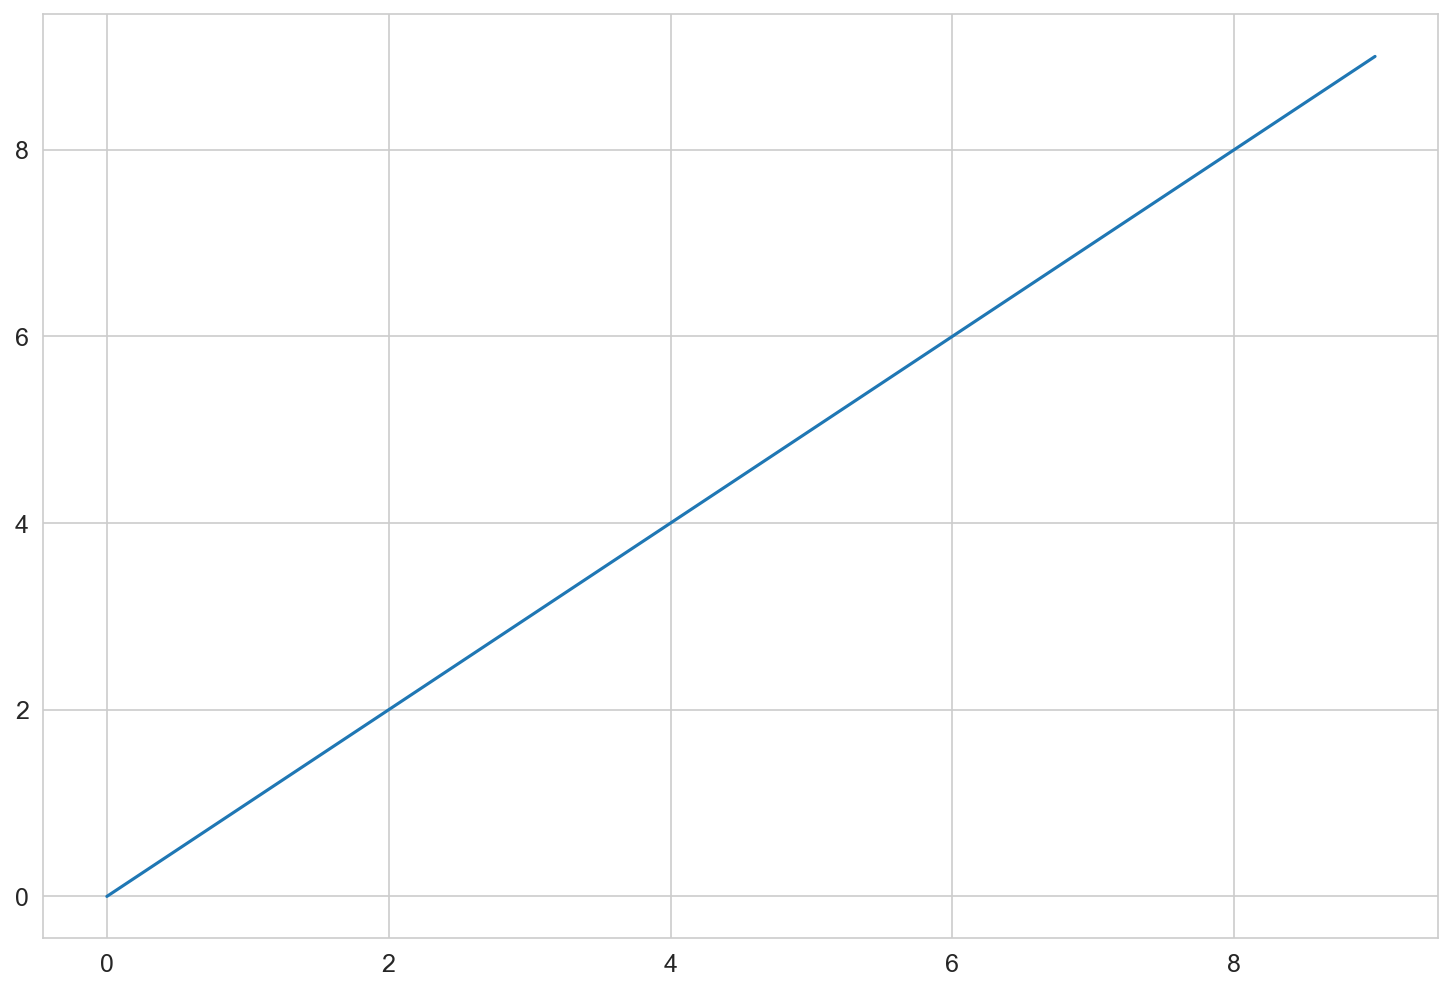

In [18]:
plt.plot(data)

### Figures and Subplots

Plots reside within figures. A figure is a blank space
until a subplot is added:

In [19]:
fig = plt.figure()
fig

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

`.add_subplot()` divides our figure in the first 2 arguments
and selects the third. Below, we're creating a 2x2 figure and 
assigning the variable to the first panel. 

In [20]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

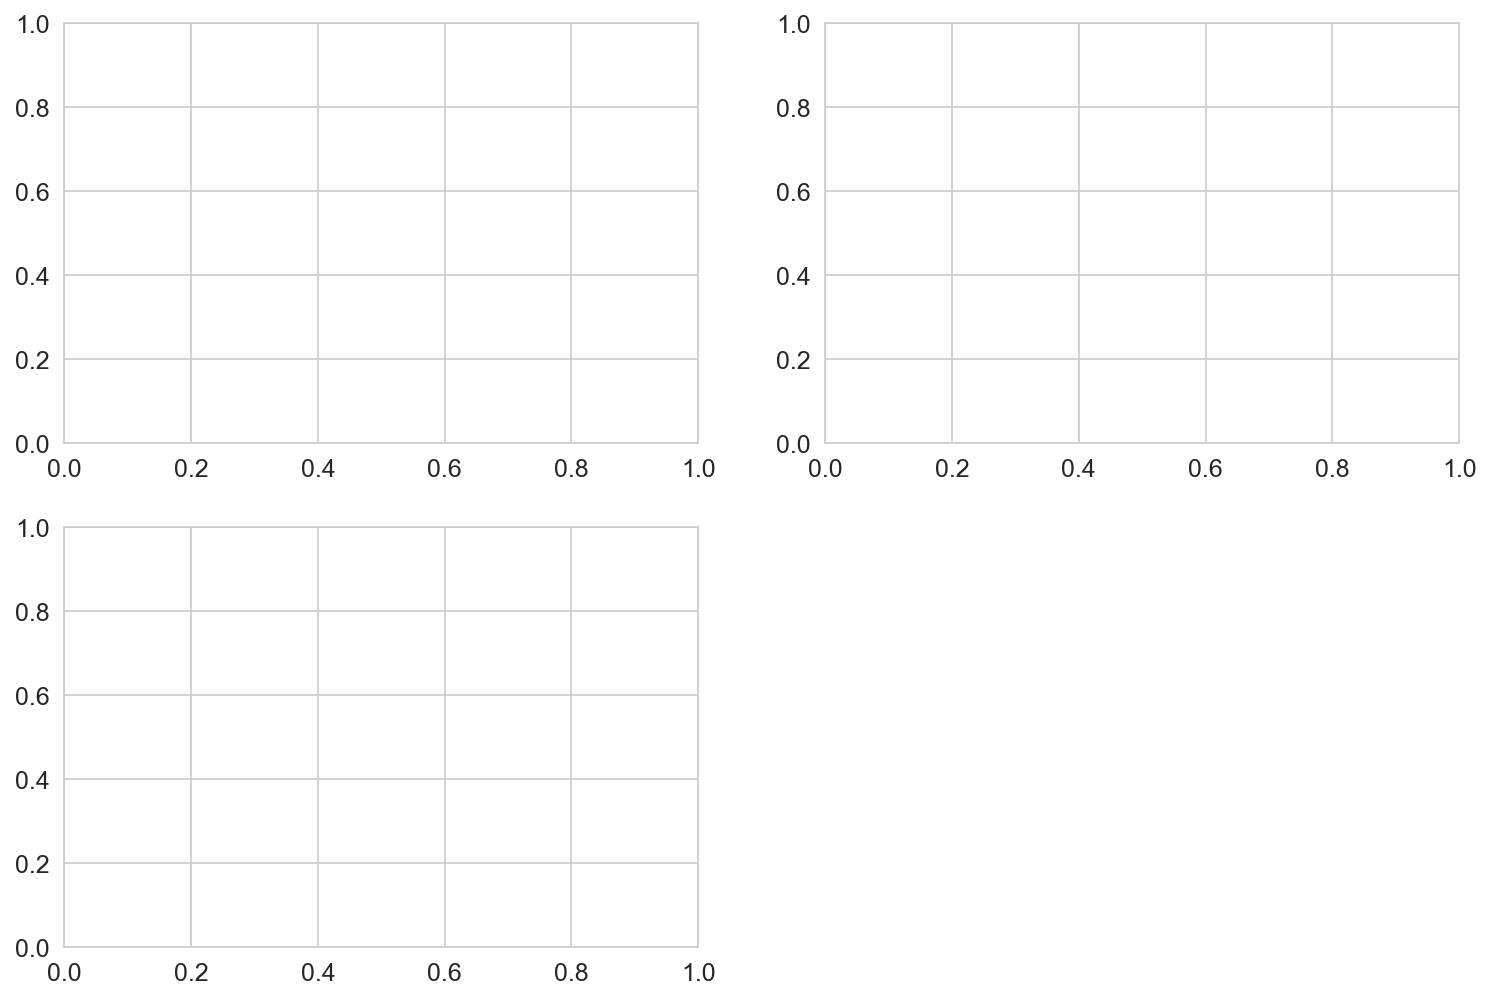

In [21]:
fig

We usually create plots within the axis objects, as it is 
preferable to do so than using the top-level methods such
as `plt.plot()`. Here we'll create a line plot with the 
`axis.plot()` method:

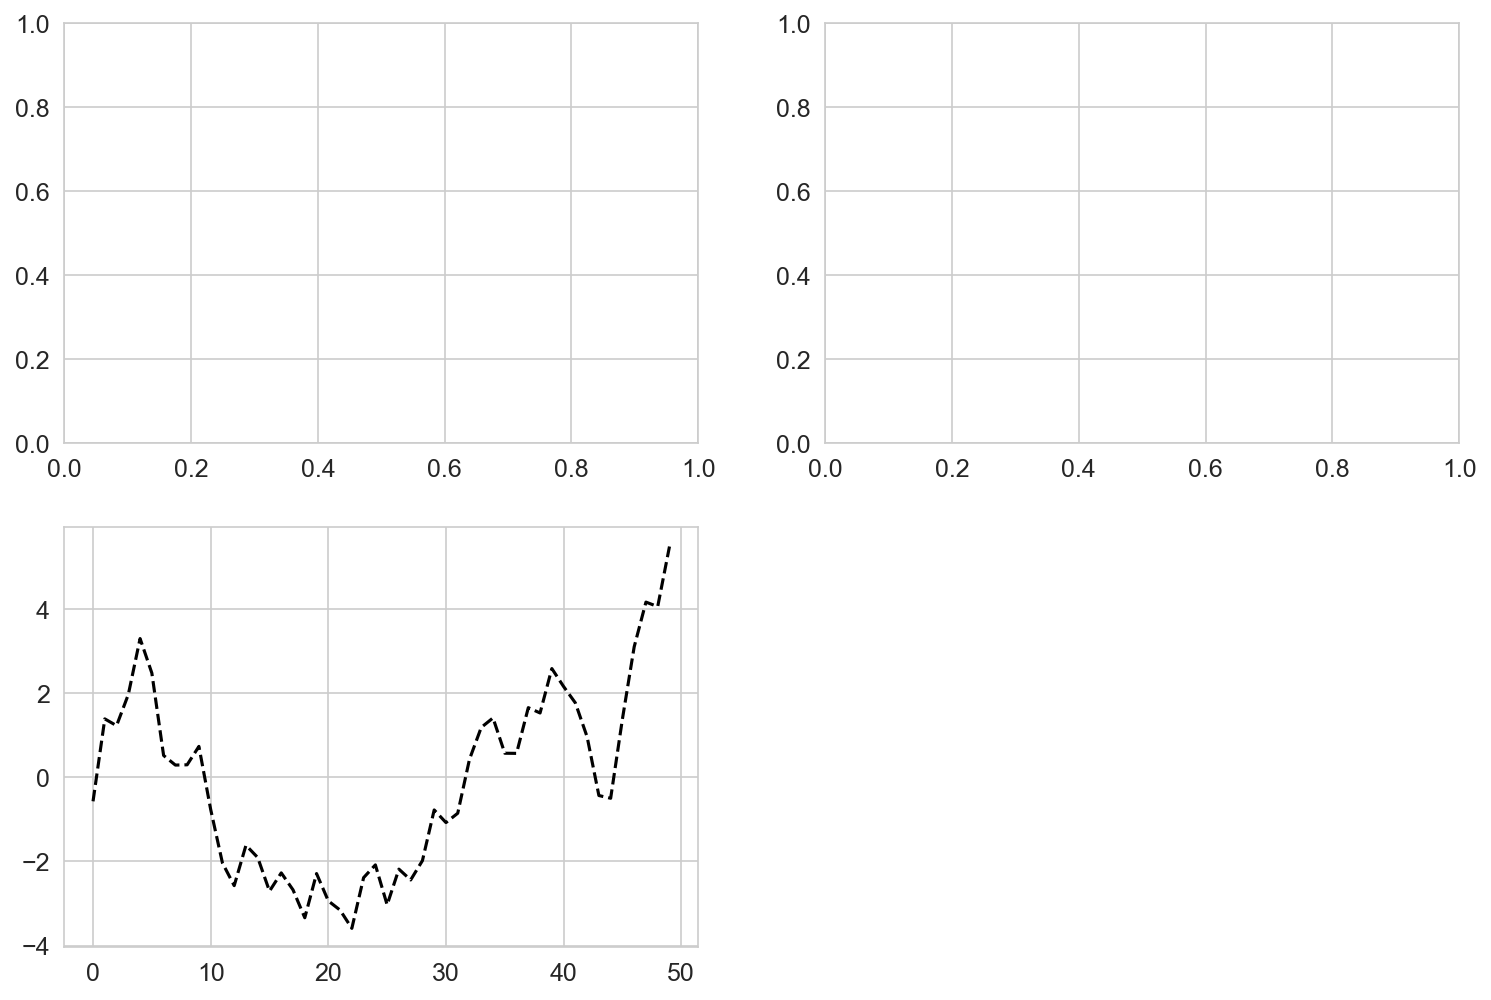

In [22]:
ax3.plot(np.random.standard_normal(50).cumsum(), linestyle='dashed', color='black')
fig

The objects returned by the `add_subplot()` method are 
`AxesSubplot` objects, on which we can plot on the other
empty subplots:

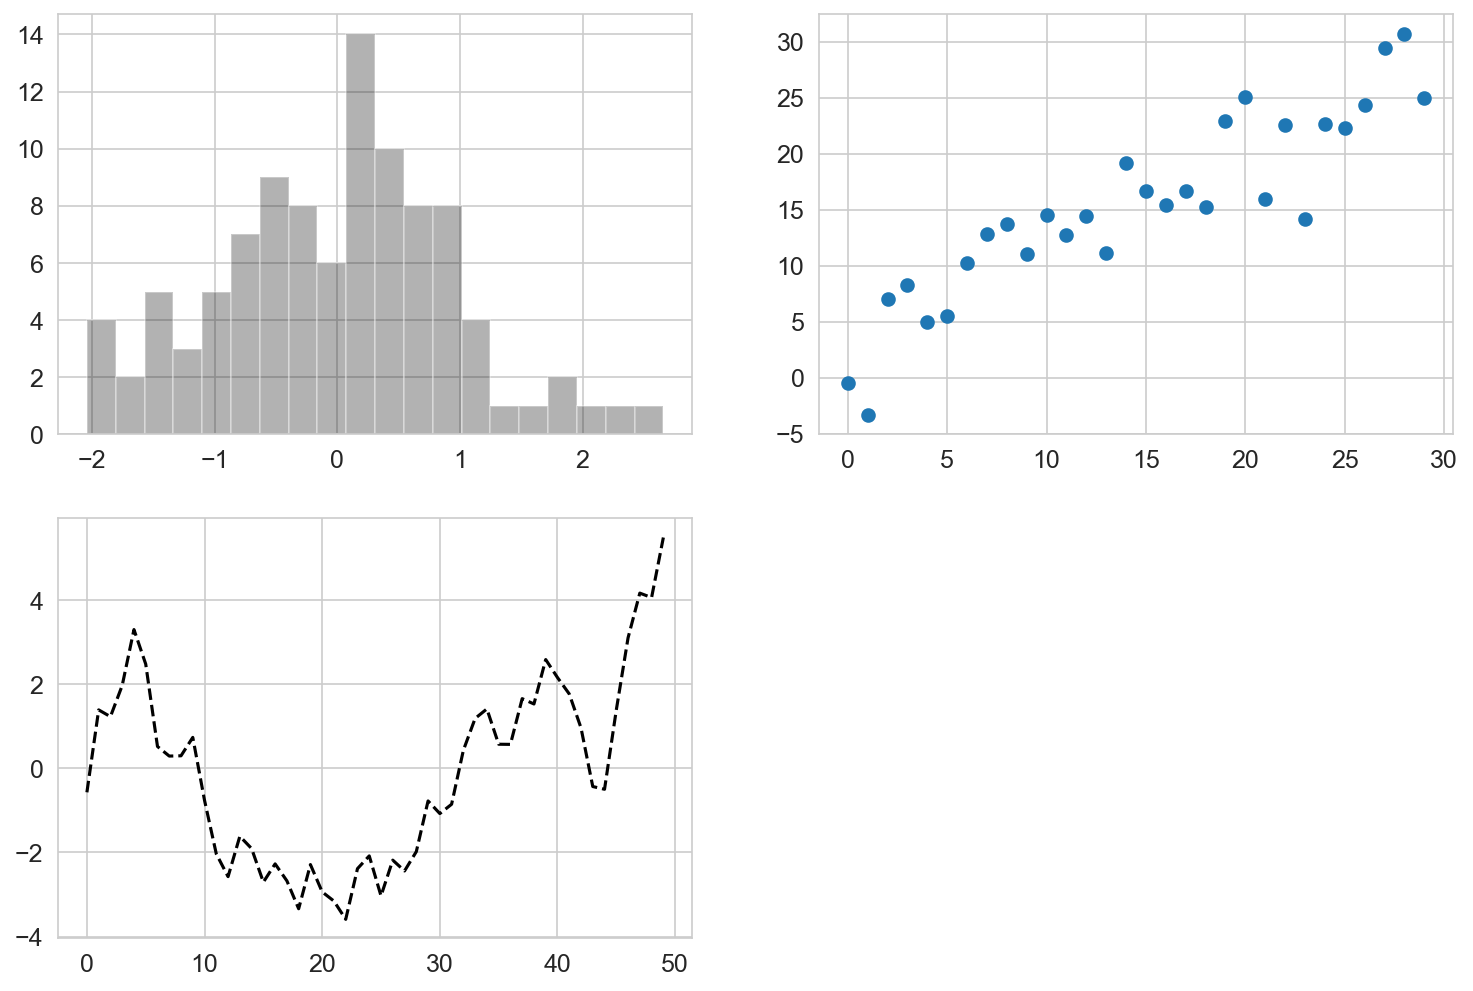

In [23]:
ax1.hist(np.random.standard_normal(100), bins=20, color='black', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
fig

`alpha=0.3` sets the transparency of the plot.
We can create lots of subplots with a single code line
with `fig, axes = plt.subplots(n, m)`, with n = rows and m = columns.
The object return is an array which can be indexed with
`array[0, 1]`

We can indicate that the subplots in the array must share
the same x or y axis with `sharex` and `sharey`, respectively.

#### Adjusting the spacing around subplots

We can adjust the spacing with the figure method `subplots_adjust(
left = None, bottom = None, right = None, top = None, wspace=None, 
hspace=None)`. 

`wspace` and `hspace` refer to the width and height, respectively, 
between subplots.

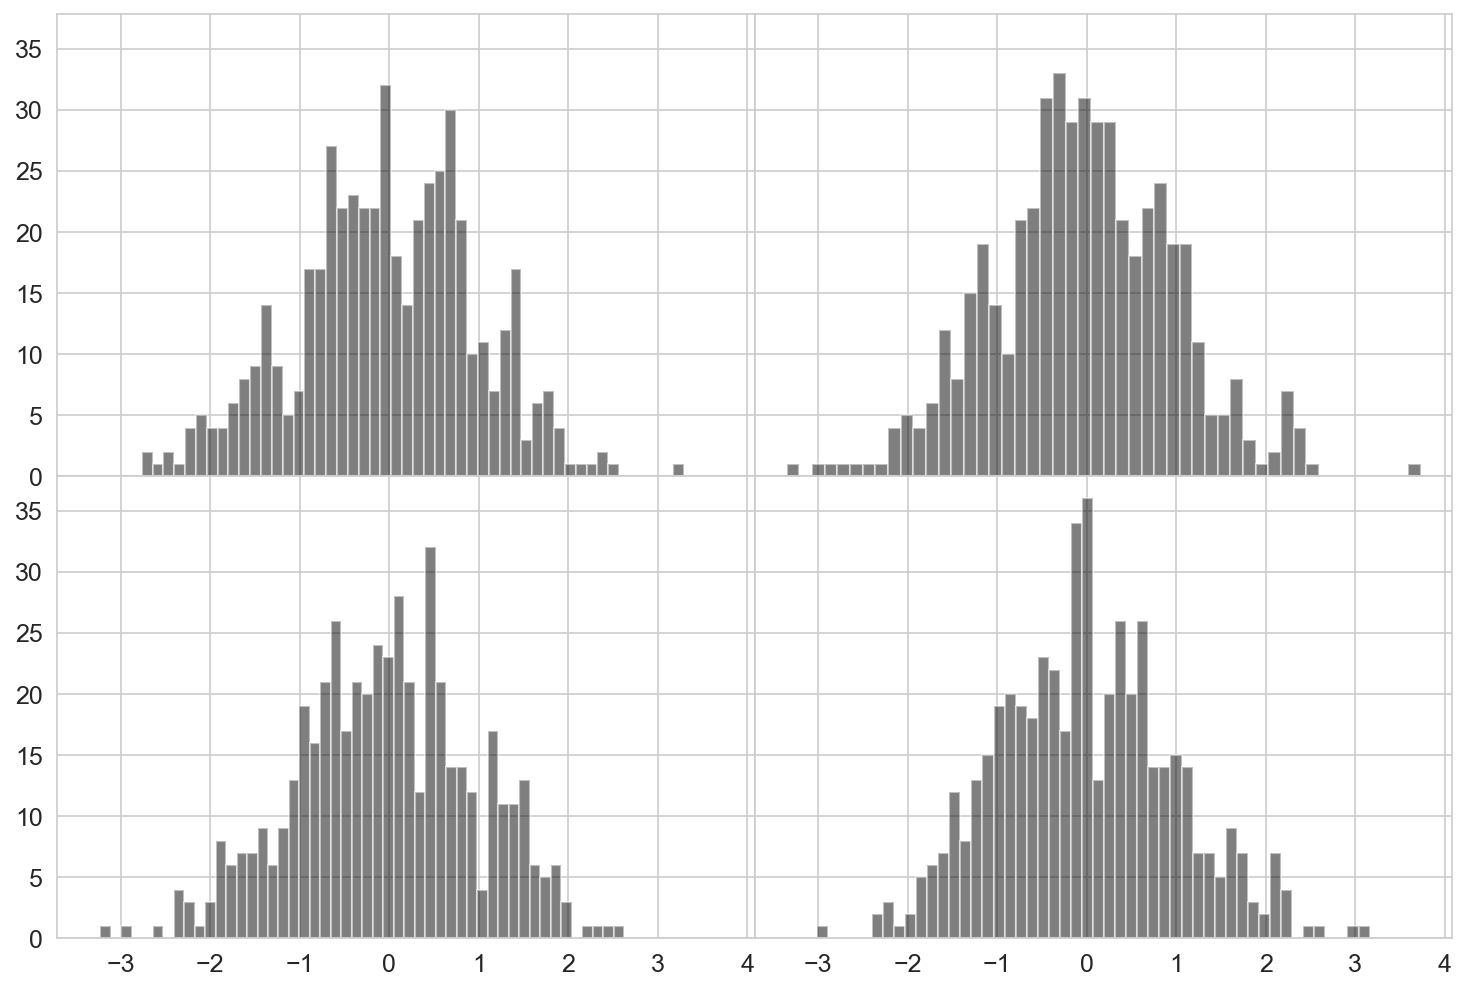

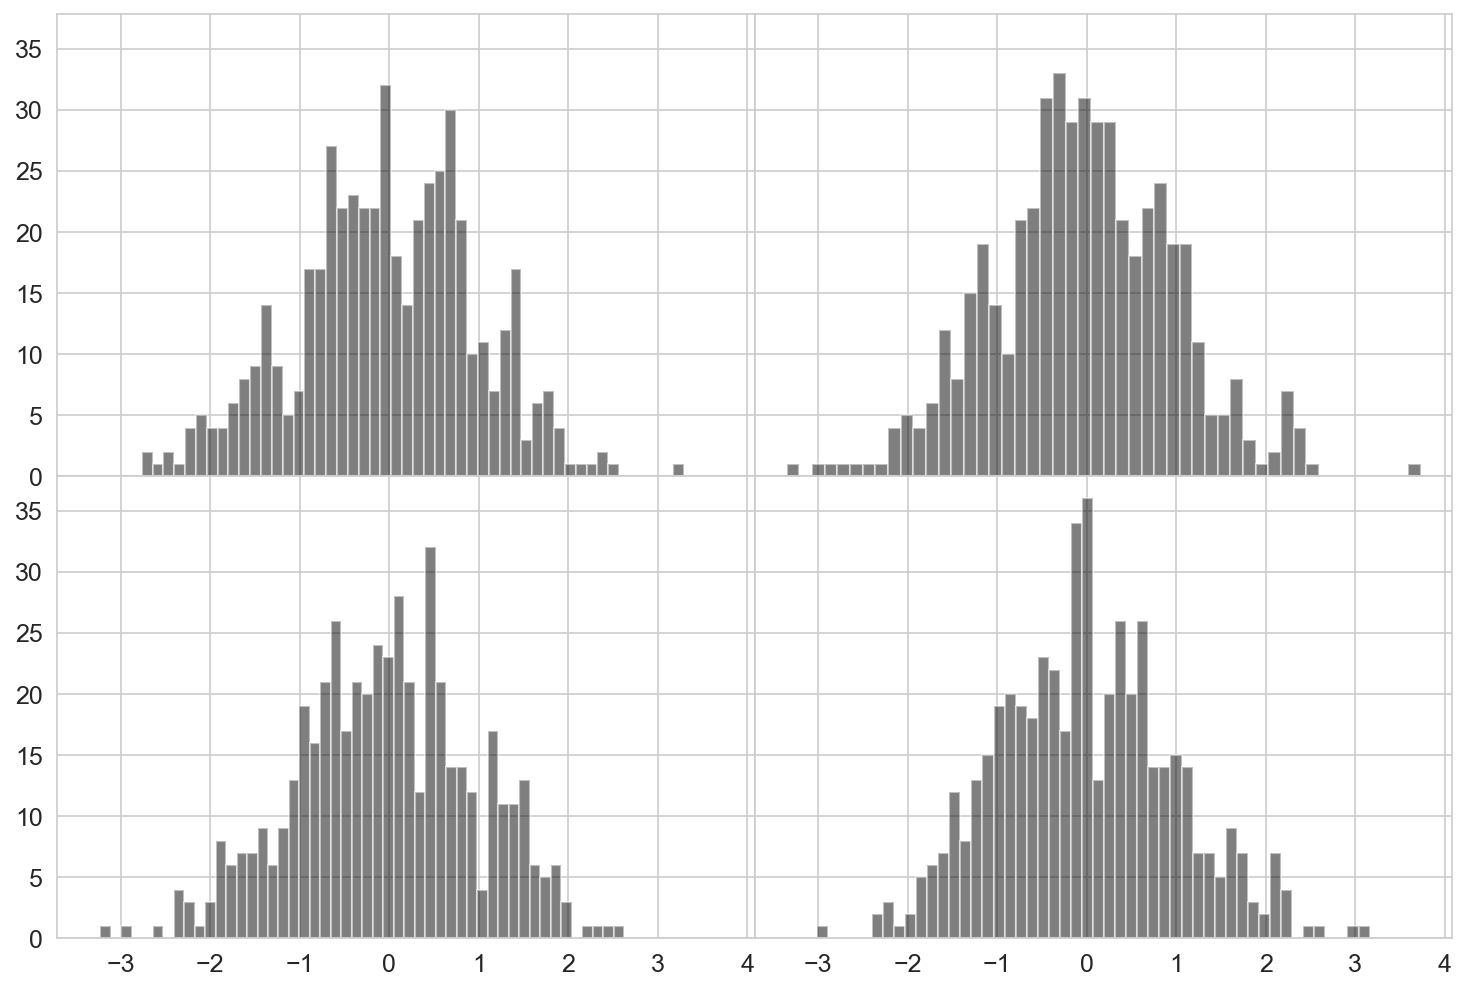

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
  for j in range(2):
    axes[i, j].hist(np.random.standard_normal(500), bins=50,
                    color='black', alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)
fig

### Colors, Markers, and Line Styles

The line `plot()` function can plot x and y arrays as
coordinates, and accepts arguments for line style and
color. To plot x and y with a dashed green line we can
write:

In [25]:
ax.plot(x, y, linestyle='--', color='green')

NameError: name 'ax' is not defined

Colors can be specified with their HexCode also, and
linestyles can be found in the online documentation 
or in `plt.plot?`.

We can use **markers** to highlight datapoints:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(np.random.standard_normal(30).cumsum(), linestyle='--',
        color='green', marker='o')
fig

With `drawstyle` we can change the way the line is drawn
between points, instead of the linear default. Look at the
comparison with `steps-post`:

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color='green',
        linestyle='--', label='Default')
ax.plot(np.random.standard_normal(30).cumsum(), color='black',
        linestyle='--', drawstyle='steps-post', label='steps-post')
ax.legend()
fig

Here, because we passed a `label` argument, we can call
`ax.legend()` to create a legend for our plot. Which leads
us to...

### Ticks, Labels and Legends

Most plot decorations can be achieved with the axis methods.
Methods such as `xlim()`, `xticks()`, and `xticklabels()` allow
you to get the current value (when called with no parameters) or
set new values (when called with parameters)

To illustrate decorations, let's use this graph of a stock price
(and definitely not a random walk):

In [ ]:
fig, ax = plt.subplots()

ax.plot(50+(np.random.standard_normal(1000)).cumsum())

We'll set the ticks and ticklabels with `set_xticks()` and
`set_xticklabels`. By default whatever we put in `set_xticks`
becomes the labels, but we'll do a custom example:

In [ ]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(['01/24', '04/24', '07/24', '10/24', '01/25'],
                   rotation=30, fontsize=12)
fig

Rotation rotates in *n* degrees. Lastly, we set an x label with
`set_xlabel` and a title with `set_title`.

In [ ]:
ax.set_xlabel('Quarters', fontsize=16)
ax.set_title('Not a Stock plot', fontsize=24)
fig

Modifying the y axis is the same process. The axes object has
a `set()` method that allows us to batch-set all this stuff:

In [ ]:
ax.set(ylabel='Dollars', title='not a Stock plot')
fig

#### Adding Legends

There are a couple of ways to add a legend. One, which we've
already seen, is to pass a `label` parameter to each plot piece
we create:

In [ ]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color='black', label='one')
ax.plot(np.random.randn(1000).cumsum(), color='green', linestyle='dashed', label='two')
ax.plot(np.random.randn(1000).cumsum(), color='red', linestyle='dotted', label='three')

In [ ]:
ax.legend()
fig

The legend location is defined by the `loc=` parameter, which
by default is 'best', the location most out of the way.

If we don't want a particular plot to have a legend, we either
pass no label or `label=_nolegend_`

### Annotations and Drawing on a Subplot

We can add text, arrows, and other elements to plots as a way
to annotate important information. For example, we can add text
at a x, y coordinate with `ax.text(x, y, 'Hello World!', family=monospace, fontsize=12)`

We'll do an example with a S&P 500 dataset starting in 2007 
(or is it?):

In [ ]:
from datetime import datetime
fig, ax = plt.subplots()

data = pd.read_csv('../pydata-book/examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, color='black')

crisis_data = [
  (datetime(2007, 10, 11), "Peak of bull market"),
  (datetime(2008, 3, 12), "Bear Stearns Fails"),
  (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 75),
              xytext=(date, spx.asof(date) + 225),
              arrowprops=dict(facecolor='black', headwidth=8, width=2, headlength=8),
              horizontalalignment='left', verticalalignment='top', fontsize=16)

  # Zoom in on 2007-2010
  ax.set_xlim(['1/1/2007', '1/1/2011'])
  ax.set_ylim([600, 1800])

  ax.set_title("Important dates in the 2008-2009 financial crisis", fontsize=24)

To note from this plot: 

The `annotate(label, xy)` can annotate labels on xy coordinates.

We can also add shapes, mostly known as `patches`. we do so by 
creating the patches with `plt.Circle()` or `plt.Rectangle()`, 
for example, and adding them to the plot with `ax.add_patch(patch)`:

In [ ]:
fig, ax = plt.subplots() 
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3) 
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3) 
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],  
                   color="green", alpha=0.5) 
ax.add_patch(rect) 
ax.add_patch(circ) 
ax.add_patch(pgon)

### Saving Plots to a File

We can save figures to a file with `fig.savefig('file.ext')`
The file type is inferred from the extension, and can be
SVG, PNG, PDF... We can specify a dpi with `dpi` argument.

The `facecolor`, `edgecolor` parameters define the color for
the background and edges of the plots.

## 9.2 Plotting with pandas and seaborn

Pandas has some tools for plotting built on top of `matplotlib`
to make plotting from various columns of data easier. We'll also
explore the `seaborn` package, which is also built on top of 
matplotlib.

### Line Plots

Series and DataFrames have a `plot()` method for making plots.
By default, they make a line plot:

In [ ]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot(title="first pandas plot", grid=True, xlim=[0, 90], xticks=range(0, 91, 10))

We can set many parameters with the same name they had in
`matplotlib`, but now inside the `plot()` method.

DataFrame's plot method plots each column as a different line,
setting a legend automatically.

In [ ]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(title='My first DataFrame plot', grid=True, xticks=range(0, 91, 10),
        xlim=[0, 90])

Some DataFrame plot specific parameters are `subplots=True`
for plotting the columns on different subplots, `sharex` and
`sharey` for such case, `legend` (true by default), `sort_columns`.

The `plot()` method contains more methods for different
plot types. `plot()` is equivalent to `plot().line()`
We'll see some of these child methods ahead:

### Bar Plots

`plot.bar()` and `plot.barh()` make vertical and horizontal bar 
plots. The Series or DF index is used as x (bar) or y (barh) ticks.

In [ ]:
fig, axes = plt.subplots(1, 2)
data = pd.Series(np.random.uniform(size=16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='black', alpha=0.7)

data.plot.barh(ax=axes[1], color='black', alpha=0.7)

What about DataFrames?

In [ ]:
df = pd.DataFrame(np.random.uniform(size=(6,4)),
                  index=pd.Index(['one', 'two', 'three', 'four', 'five', 'six'], name='index'),
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

In [ ]:
df.plot.bar()

The column and index names are used as labels for the
legend and xlabel, respectively.

We can create **stacked bar plots** by passing `stacked=True`:

In [ ]:
df.plot.barh(stacked=True, alpha=0.5)

A useful recipe for visualizing a Series `value_counts()` is
`s.value_counts().plot.bar()`

Let's do some visualization with a dataset about restaurant 
tipping. First, we'll try to visualize the percentage of 
party size for each day of the week. Let's start by loading
the dataset and preparing it:

In [28]:
tips = pd.read_csv('../pydata-book/examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [ ]:
party_size = pd.crosstab(tips['day'], tips['size'])
party_size = party_size.reindex(['Thur', 'Fri', 'Sat', 'Sun'])
party_size

Since there's almost no 1 and 6 sized parties, we'll remove them:

In [ ]:
party_size = party_size.loc[:, 2:5]

Then we'll normalize by dividing each value by the sum across
the index:

In [ ]:
party_size = party_size.div(party_size.sum(axis=1), axis=0)
party_size.plot.bar(stacked=True)

Seaborn can make data visualization requiring aggregation
or summarization much simpler. Lets visualize tipping percentage
by day of the week:

In [30]:
tips['tip_pct'] = tips['tip']/(tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


In [ ]:
import seaborn as sns
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

Here the black lines represent 95 confidence intervals. 
Seaborn plots take a `data=` argument, which can be a pandas
object, and column names for x and y coordinates.

Because there are multiple observations for each day, the value 
presented is the average value. This can be configured by
arguments of the plotting function.

There's a hue option that allows us to split by a second 
category:

In [ ]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

Seaborn has taken care of most of the styling automatically,
but we can swap between different themes with `set_style`

In [ ]:
sns.set_style('whitegrid')

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histogram and Density Plots

A histogram can be made with `plot.hist()`. In it, we can specify 
the number of bins of the data. Making a histogram of the `tips_pct`:

In [ ]:
tips['tip_pct'].plot.hist(bins=50)

A density plot tries to estimate continuous probability distribution
of the data, usually using distributions such as the normal.
We can plot density distribution with `plot.density()`:

In [ ]:
tips['tip_pct'].plot.density()

Seaborn allows us to make simultaneous density and histogram plots.
Consider this bimodal example from two normal distributions:

In [ ]:
comp1 = np.random.standard_normal(200)

comp2 = 10 + 2*np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, kde=True)

### Scatter of Point Plots

Seaborn makes scatterplots more complete with the `regplot()`
method, which makes a scatter plot alongside a linear regression
line for the plot, with intervals and what not:

In [ ]:
macro = pd.read_csv('../pydata-book/examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

trans_data = np.log(data).diff().dropna()

trans_data.tail()

In [ ]:
sns.set_style('whitegrid')
sns.regplot(x = 'm1', y='unemp', data=trans_data)

In EDA, it is helpful to be able to look at all the 
scatterplots among a group of variables in a matrix
sort of way. `seaborn` makes it possible with `pairplot`:

In [ ]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

The `plot_kws` arguments allows us to pass configurations
to the styling of the off-diagonal elements

### Facet Grids and Categorical Data

If our data has multiple category columns, it may be useful
to see how data differs for each category. Seaborn has `catplo()`,
with various different ways to visualize plot split by categories:

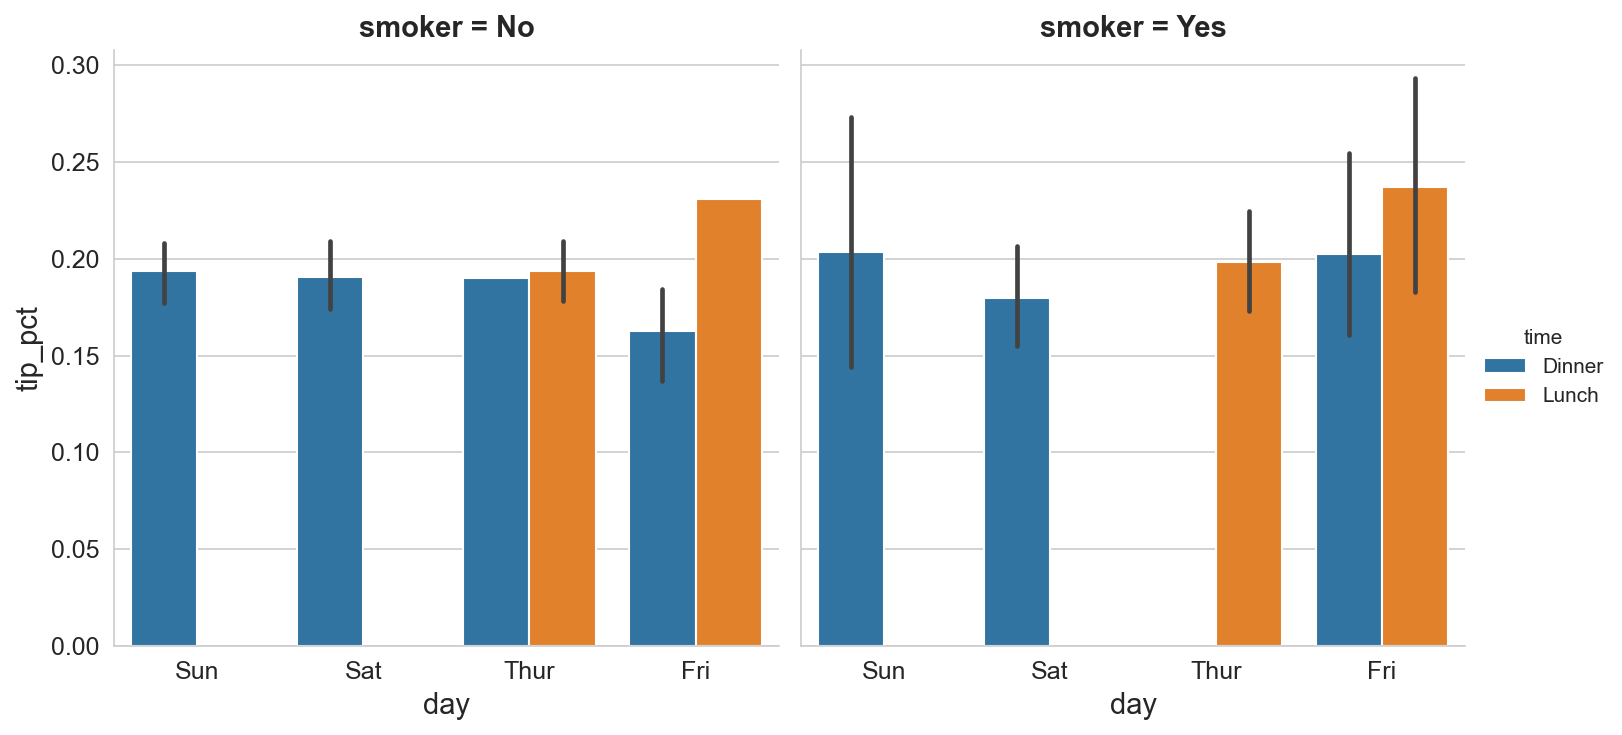

In [31]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar',
            data=tips[tips.tip_pct < 1])

Instead of using time in the `hue`, which creates another bar,
we could split it in a grid with `row`:

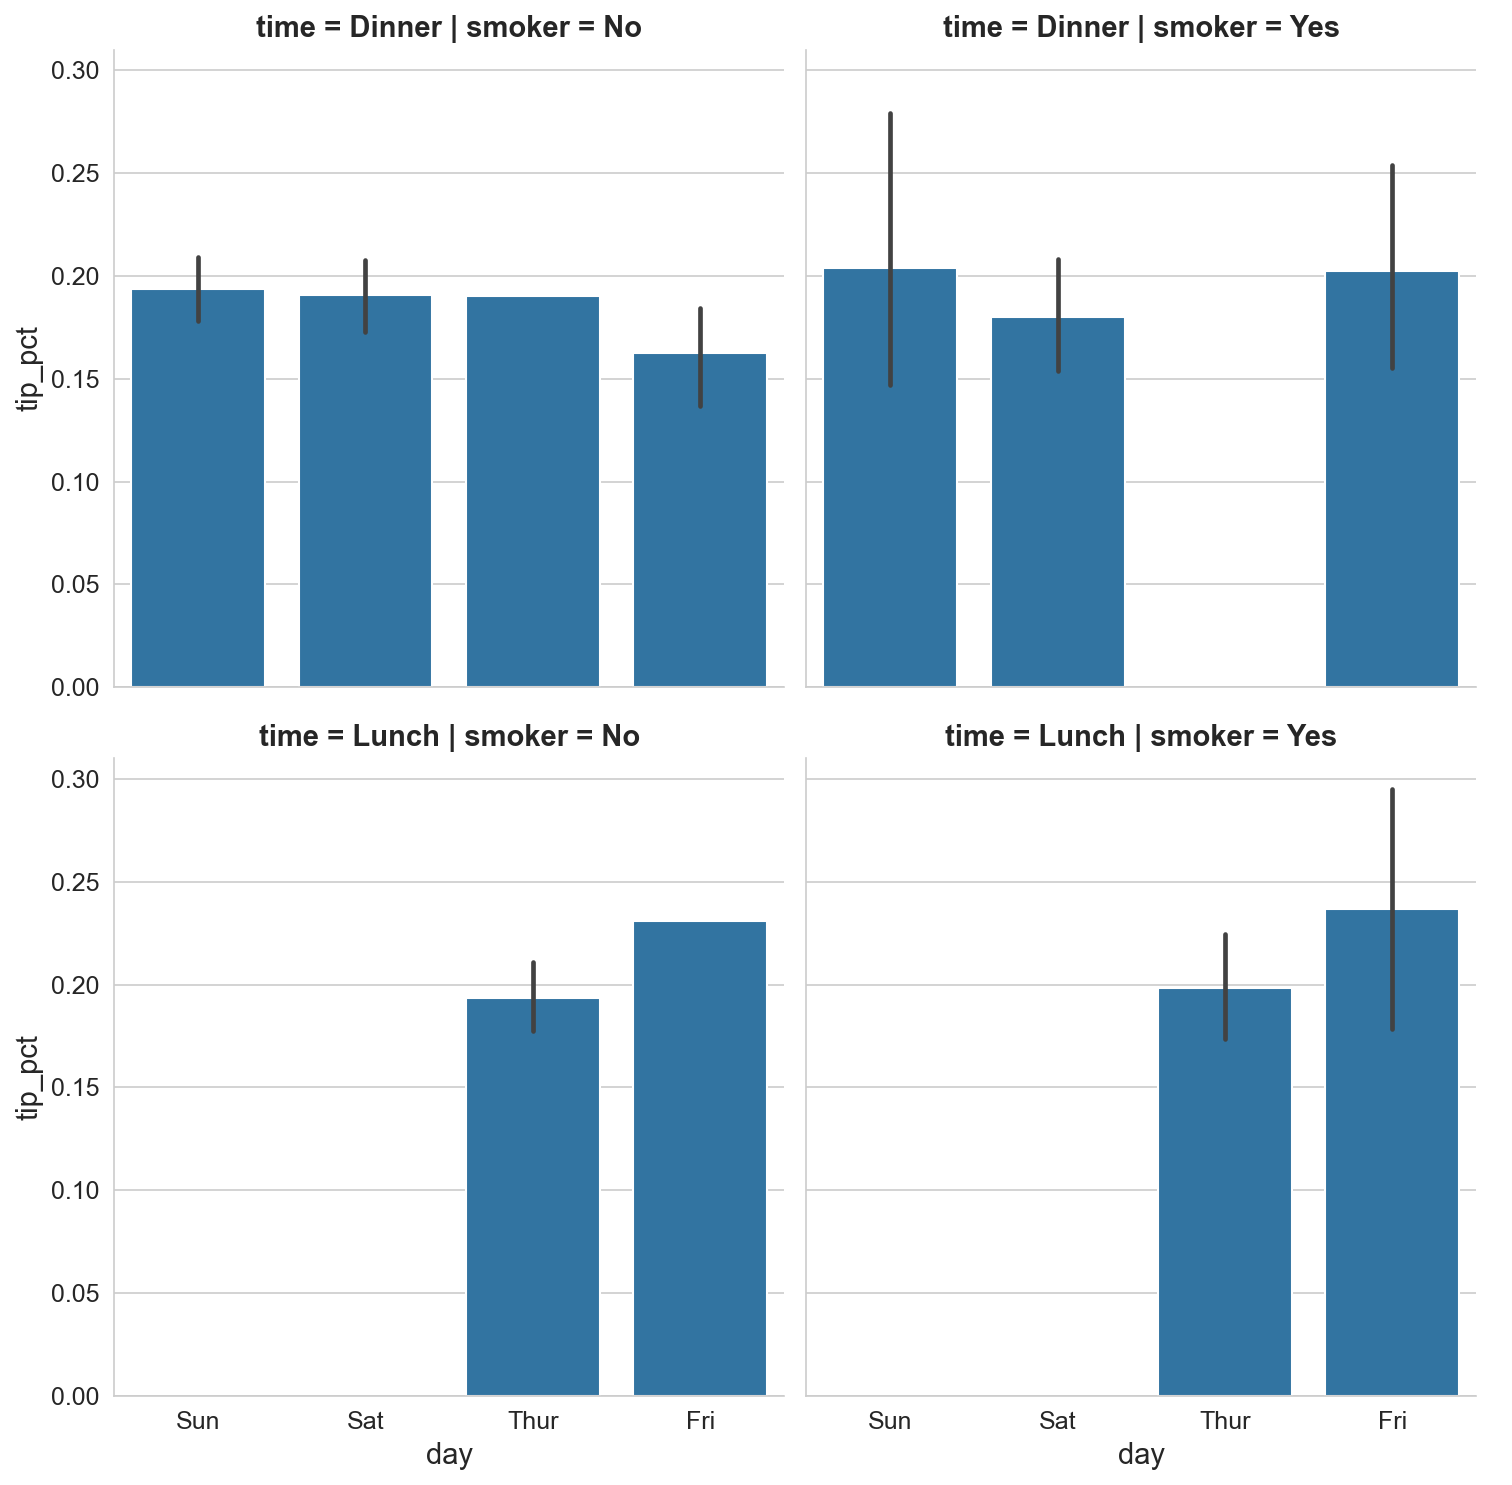

In [33]:
sns.catplot(x='day', y='tip_pct', col='smoker', row='time',
            kind='bar', data=tips[tips.tip_pct < 1])

Other `kind` of plots supported by catplot are `'box'`, 
maybe `'vioin'`, and others!:

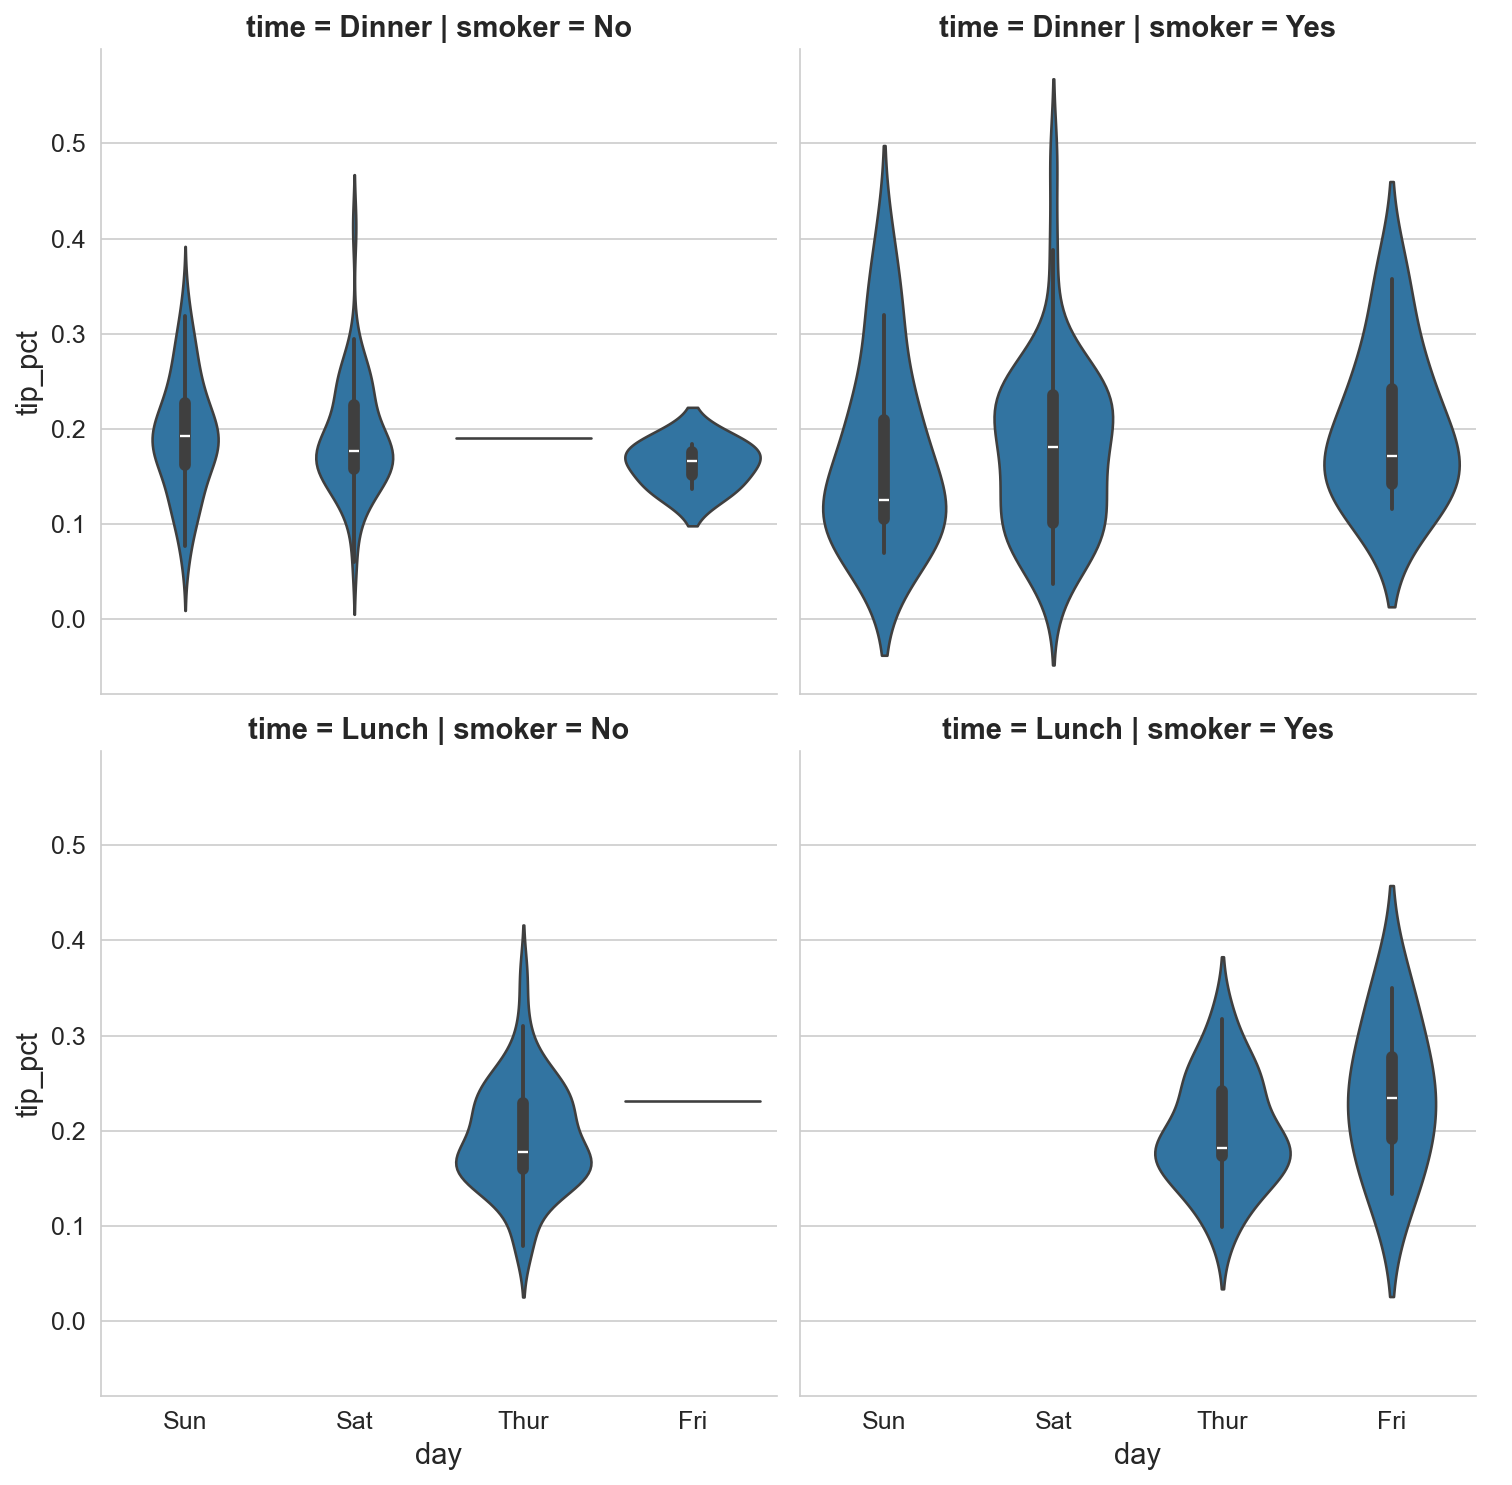

In [40]:
sns.catplot(x='day', y='tip_pct', kind='violin',
            col='smoker', row='time', data=tips[tips.tip_pct < 0.5])


## Summary

- matplotlib API basics:
    - the starting frame is a `figure(n, m)`, which has n rows and m columns for plotting.
    - AxesSubplot objects are created with `fig.add_subplot(n, m, i)`
    - in Axes we create plots such as `hist(data, bins)`, `scatter(data, data)`
    - We adjust space between plots with `fig.subplots_adjust(wspace, hspace)`
    - subplots can `sharex`, `sharey`
    - We can set `color`, `linestyle`, `drawstyle`, `marker`
    - We can `set_xticks`, `set_xticklabels`, as well as `rotation`, `fontsize`, `fontweight` 
    - We can `.annotate(label, xy, arrowprops)` on the plot, as well as draw with `patches` and `add_patches`
    - We can `fig.savefig('file.ext')`
- Pandas and Seaborn increments:
    - pandas objects have a `plot()` method, that defaults to line plots 
    - on dataframes, `plot(subplots=True)` makes columns be different plots
    - `plots` has children, such as `plot.bar()` and `barh()`
    - The plots can be done on Axes objects with `ax=` parameter
    - Seaborn `sns.barplot()` receives `data=` and `x`, `y` columns for plotting, as well as `orient` and `hue`
    - For histograms and density plots, pandas objects have `plot.hist(bins=n)` and `plot.density()`.
    - Seaborn has `sns.histplot(data, bins=, kde=False)` to plot hist and density simultaneously
    - Seaborn scatterplots can be done with `regplot(x, y, data)` giving us regression lines as well
    - Scatterplot grids can be done with `pairplot(data, diag_kind='kde')`
    - Categorical plots can be made with `catplot(x, y, kind=<box, bar, violin>, row, col)`